In [1]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
pip install pyecharts

     |████████████████████████████████| 135 kB 4.1 MB/s 
     |████████████████████████████████| 129 kB 43.4 MB/s 


In [36]:
pip install chart_studio

     |████████████████████████████████| 64 kB 1.8 MB/s 


In [34]:
import pyecharts

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator
import seaborn as sns
from datetime import datetime
from matplotlib import font_manager, rc

from pyecharts.charts import Bar
from pyecharts.charts import Line

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'

-rw------- 1 root root 75337 Nov 15 08:31 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
-rw------- 1 root root 17367 Nov 15 09:47 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'


In [5]:
DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv')
DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv')

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2662 non-null   object 
 1   coin_name  2662 non-null   object 
 2   num        2662 non-null   int64  
 3   s          2662 non-null   float64
 4   lang       2662 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 104.1+ KB


In [7]:
DF.groupby('coin_name')['coin_name'].count()

coin_name
ada     253
bch     227
btc     298
doge    164
eos      41
eth     346
omg     526
snt     742
xrp      65
Name: coin_name, dtype: int64

In [10]:
DF_bch = DF[DF['coin_name'] == 'bch']

In [11]:
DF_bch

,date,coin_name,num,s,lang
0,2016-05-31,bch,69,0.927536,kor
1152,2021-03-12,bch,21,0.476190,kor
1158,2021-03-13,bch,10,0.700000,kor
1164,2021-03-14,bch,5,1.200000,kor
1169,2021-03-15,bch,22,0.772727,kor
...,...,...,...,...,...
2623,2021-11-08,bch,8,0.875000,kor
2632,2021-11-09,bch,9,0.333333,kor
2639,2021-11-10,bch,10,0.300000,kor
2647,2021-11-11,bch,10,0.300000,kor


In [13]:
DF_bch = DF_bch.reset_index(drop=True)

In [14]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      246 non-null    object
 1   Price     246 non-null    object
 2   Open      246 non-null    object
 3   High      246 non-null    object
 4   Low       246 non-null    object
 5   Vol.      246 non-null    object
 6   Change %  246 non-null    object
dtypes: object(7)
memory usage: 13.6+ KB


In [15]:
DF_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 12, 2021",668.20,676.70,684.50,647.00,107.14K,-1.26%
1,"Nov 11, 2021",676.70,663.60,680.70,658.60,93.52K,1.97%
2,"Nov 10, 2021",663.60,717.10,729.10,649.30,290.49K,-7.46%
3,"Nov 09, 2021",717.10,638.50,731.00,636.50,337.53K,12.31%
4,"Nov 08, 2021",638.50,600.30,642.10,598.90,131.61K,6.36%


In [55]:
 DF_price['Price'] = pd.to_numeric(DF_price['Price'], downcast = 'float')

ValueError: ignored

In [16]:
date_time_obj = datetime.strptime(DF_price['Date'][0], '%b %d, %Y')
date_time_obj

datetime.datetime(2021, 11, 12, 0, 0)

In [17]:
date_time_obj.strftime("%Y-%m-%d")

'2021-11-12'

In [18]:
DF_price.iloc[0]

Date        Nov 12, 2021
Price             668.20
Open              676.70
High              684.50
Low               647.00
Vol.             107.14K
Change %          -1.26%
Name: 0, dtype: object

In [19]:
A = []
for i in range(246):
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  A.append(a)

In [20]:
B = []
for i in range(246):
  x = DF_price['Price'][i]
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  Y = [a,x]
  B.append(Y)
DF_B = pd.DataFrame(B)
DF_B.columns = ['date','price']

In [123]:
# for i in DF_B['date']:
#   for j in DF_bch['date']:
#     if i == j:
#       print('매치', i, j)


매치 2021-11-12 2021-11-12
매치 2021-11-11 2021-11-11
매치 2021-11-10 2021-11-10
매치 2021-11-09 2021-11-09
매치 2021-11-08 2021-11-08
매치 2021-11-07 2021-11-07
매치 2021-11-06 2021-11-06
매치 2021-11-05 2021-11-05
매치 2021-11-04 2021-11-04
매치 2021-11-03 2021-11-03
매치 2021-11-02 2021-11-02
매치 2021-11-01 2021-11-01
매치 2021-10-31 2021-10-31
매치 2021-10-30 2021-10-30
매치 2021-10-29 2021-10-29
매치 2021-10-28 2021-10-28
매치 2021-10-27 2021-10-27
매치 2021-10-26 2021-10-26
매치 2021-10-25 2021-10-25
매치 2021-10-24 2021-10-24
매치 2021-10-23 2021-10-23
매치 2021-10-22 2021-10-22
매치 2021-10-21 2021-10-21
매치 2021-10-20 2021-10-20
매치 2021-10-19 2021-10-19
매치 2021-10-18 2021-10-18
매치 2021-10-17 2021-10-17
매치 2021-10-16 2021-10-16
매치 2021-10-15 2021-10-15
매치 2021-10-14 2021-10-14
매치 2021-10-13 2021-10-13
매치 2021-10-12 2021-10-12
매치 2021-10-11 2021-10-11
매치 2021-10-10 2021-10-10
매치 2021-10-09 2021-10-09
매치 2021-10-08 2021-10-08
매치 2021-10-07 2021-10-07
매치 2021-10-06 2021-10-06
매치 2021-10-05 2021-10-05
매치 2021-10-04 2021-10-04


In [21]:
C = []
for i in range(len(DF_B)):
  for j in range(len(DF_bch)):
    if DF_B['date'][i] == DF_bch['date'][j]:
      # print('매치', i, j , DF_B['date'][i], DF_bch['date'][j], DF_B['price'][i], DF_bch['s'][j])
      a = DF_B['date'][i]
      b = DF_B['price'][i]
      c = DF_bch['s'][j]
      d = DF_bch['num'][j]
      Y = [a,b,c,d]
      C.append(Y)
DF_bch_F = pd.DataFrame(C)
DF_bch_F.columns = ['date','price','s','num']

In [22]:
DF_bch_F

,date,price,s,num
0,2021-11-12,668.20,0.666667,9
1,2021-11-11,676.70,0.300000,10
2,2021-11-10,663.60,0.300000,10
3,2021-11-09,717.10,0.333333,9
4,2021-11-08,638.50,0.875000,8
...,...,...,...,...
221,2021-03-16,528.67,0.857143,14
222,2021-03-15,523.15,0.772727,22
223,2021-03-14,553.61,1.200000,5
224,2021-03-13,593.49,0.700000,10


In [54]:
DF_bch_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    226 non-null    object 
 1   price   226 non-null    object 
 2   s       226 non-null    float64
 3   num     226 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.2+ KB


In [23]:
y_values = DF_bch_F['s']

In [51]:
z_values = DF_bch_F['price']

In [52]:
x_values = DF_bch_F['date']	

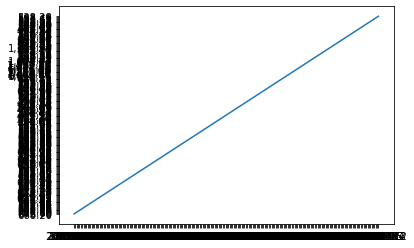

In [53]:
plt.plot(x_values,z_values)
plt.show()

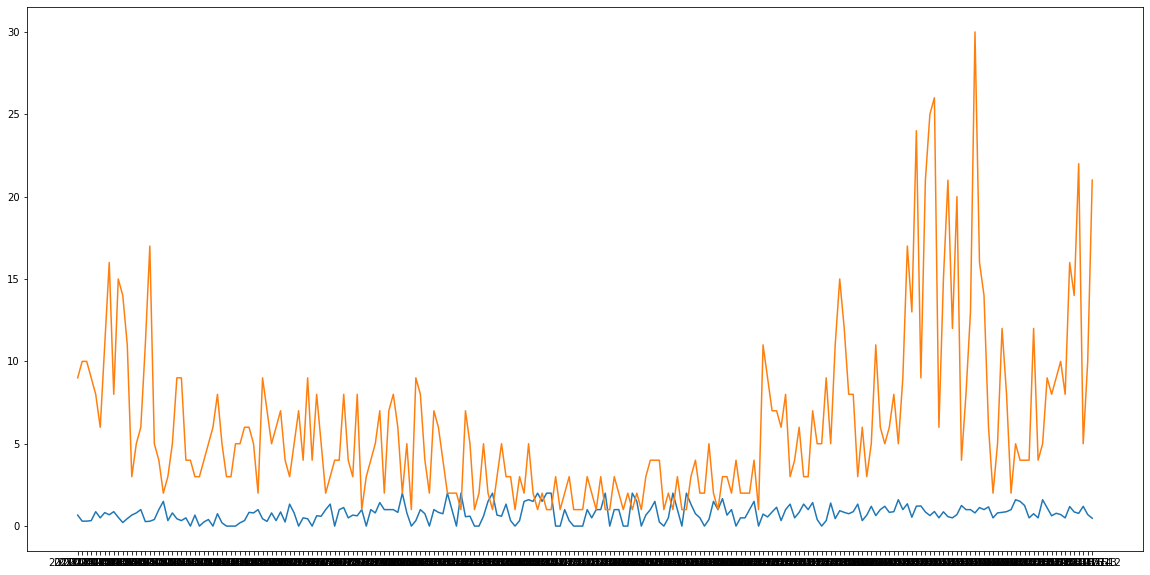

In [50]:
plt.figure(figsize=(20,10))

x_values = DF_bch_F['date']	
y_values = DF_bch_F['s']
z_values = DF_bch_F['num']
plt.plot(x_values, y_values)	
plt.plot(x_values, z_values)

plt.show()

In [48]:
attr = DF_bch_F['data']
v1 = DF_bch_F['s']
v2 = DF_bch_F['price']
bar =Bar("확인")
bar.add("sentimant", attr, v1, is_stack=True)
bar.add("price", attr, v1, is_stack=True)
bar.render()

KeyError: ignored

In [45]:
# line = Line('스크롤을 줄여 세부사항을 확인해보세요!', width=900, height=500 )
line = Line("대한민국 코로나19 누적현황", "누적 코로나 환자 현황입니다. 스크롤을 줄여 세부사항을 확인해보세요!",width=900,height=500 )
line.add("날짜", DF_bch['date'], DF_bch['s'],  label_color=['red'], is_datazoom_show=True, datazoom_range=[0, 100]
         , mark_point_symbolsize=50,  mark_point_size=60 , legend_text_size=15, legend_pos= 'right'
         ,mark_point=['max','min'], mark_line=["average"]
        )
line

TypeError: ignored

In [46]:
line = Line("대한민국 코로나19 누적현황", "누적 코로나 환자 현황입니다. 스크롤을 줄여 세부사항을 확인해보세요!",width=900,height=500 )

TypeError: ignored

In [47]:
line.add("날짜", DF_bch['date'], DF_bch['s'],  label_color=['red'], is_datazoom_show=True, datazoom_range=[0, 100]
         , mark_point_symbolsize=50,  mark_point_size=60 , legend_text_size=15, legend_pos= 'right'
         ,mark_point=['max','min'], mark_line=["average"]
        )
line

NameError: ignored